In [1]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
from numpy import nan
from matplotlib import pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
from datetime import datetime
from datetime import date

## # Import des données ##

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(f"/content/drive/MyDrive/Projet_3_Transports_publics/Aout_velo1.csv", sep=';')

In [4]:
### Variable de la date du jour
df["Date_et_heure"] = pd.to_datetime(df["Date et heure de comptage"])
today = datetime.now()
df["Date_et_heure"]

0         2021-11-02 06:00:00+01:00
1         2021-11-02 07:00:00+01:00
2         2021-11-02 08:00:00+01:00
3         2021-11-02 10:00:00+01:00
4         2021-11-02 11:00:00+01:00
                    ...            
303835    2022-01-13 08:00:00+01:00
303836    2022-01-13 11:00:00+01:00
303837    2022-01-13 12:00:00+01:00
303838    2022-01-13 20:00:00+01:00
303839    2022-01-13 21:00:00+01:00
Name: Date_et_heure, Length: 303840, dtype: object

In [5]:
### Création d'une variable qui donne le jour du mois présent
jour_du_mois = date.today()
jour_du_mois.day

30

In [6]:
### Retirer la zone de la date avec la fonction lambda sur chaque ligne
df['Date_et_heure'] = df['Date_et_heure'].apply(lambda x: x.replace(tzinfo=None))

In [7]:
### Création d'une colonne avec le nombre de jour depuis le moment present
### Retirer les heures de la variable "nb de jour"
df["today"] = today
df["today"] = pd.to_datetime(df["today"]).dt.date ### Je retire les heures afin d'avoir juste le nombre jour
df["date"] = pd.to_datetime(df["Date_et_heure"]).dt.date
df["nb_de_jour"] = df["today"] - df["date"]

In [8]:
### Creer une colone avec l'heure
df["heure"] = pd.to_datetime(df["Date_et_heure"]).dt.hour ### fonction dt.hour pour avoir juste l'heure


In [9]:
df["delta_par_mois"] = round((today - df["Date_et_heure"]) / np.timedelta64(1,'M'))

In [10]:
### Création d'une colonne avec le nom du jour
### Avec la fonction strftime (string from time)

df["Jours"] = df['Date_et_heure'].dt.day_name()

In [11]:
pip install dateparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 288 kB 15.1 MB/s 
     |████████████████████████████████| 749 kB 72.7 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2022.6.2
    Uninstalling regex-2022.6.2:
      Successfully uninstalled regex-2022.6.2


In [12]:
### Fonction pour créer une date avec des mots
from dateutil import parser
import dateparser

### Création d'une variable qui retourne la date 1 ans en arriere par rapport a la date d'aujourd'hui
depuis_1_ans = dateparser.parse("il y a 1 ans")

In [13]:
#df.dropna(inplace=True)

In [14]:
col_a_sup = ["cdate"]
df.drop(col_a_sup,axis=1,inplace=True)

## # DataViz ##

In [15]:
### Pour un emplacement de compteur vélo sur 1 journée

list_id = []   ### Création d'une liste de compteur
for id in df["ident"]:
    if not id in list_id:
        list_id.append(id)
print(list_id)

['Z904CT4', 'Z601CT8', 'Z901CT6', 'Z31CT10', 'Z203CT6', 'Z904CT5', 'Z901CT5', 'Z901CT4', 'Z601CT7', 'Z901CT7', 'Z401CT8', 'Z401CT9', 'Z2903CT5', 'Z2903CT6', 'Z1705CT1', 'Z203CT7', 'Z31CT11', 'Z201CT5', 'Z2203CT4', 'Z1701CT24', 'Z2203CT3', 'Z1701CT23', 'Z24CT23', 'Z24CT24', 'Z1705CT2', 'Z201CT4', 'Z401CT12', 'Z401CT11', 'Z503CT24', 'Z502CT24', 'Z503CT23', 'Z502CT23']


Z904CT4


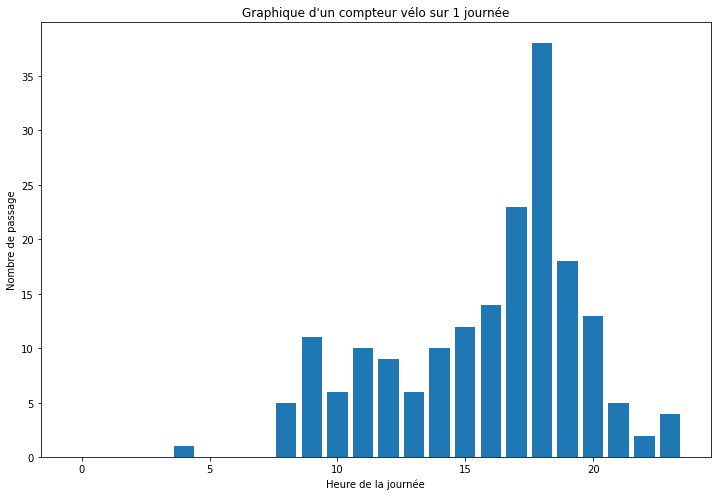

Z601CT8


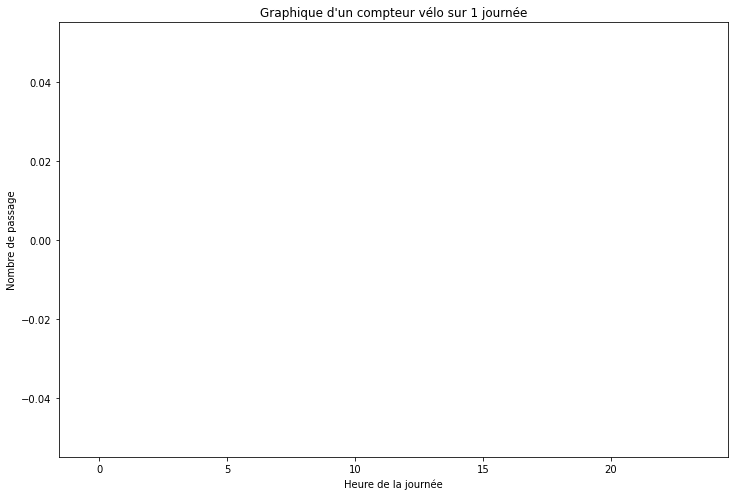

Z901CT6


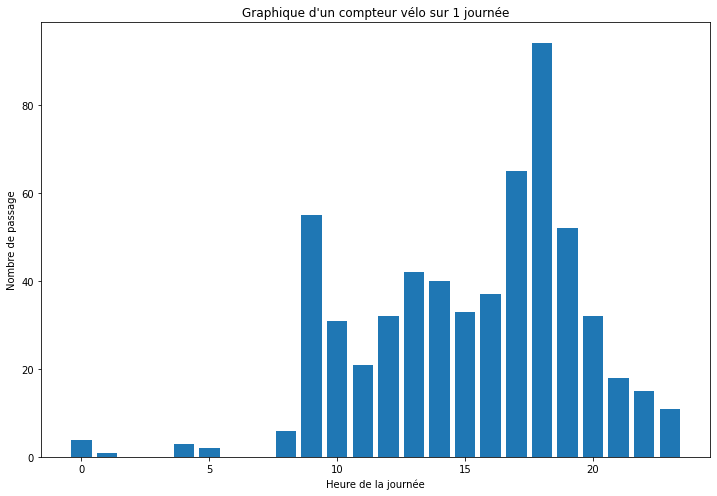

Z31CT10


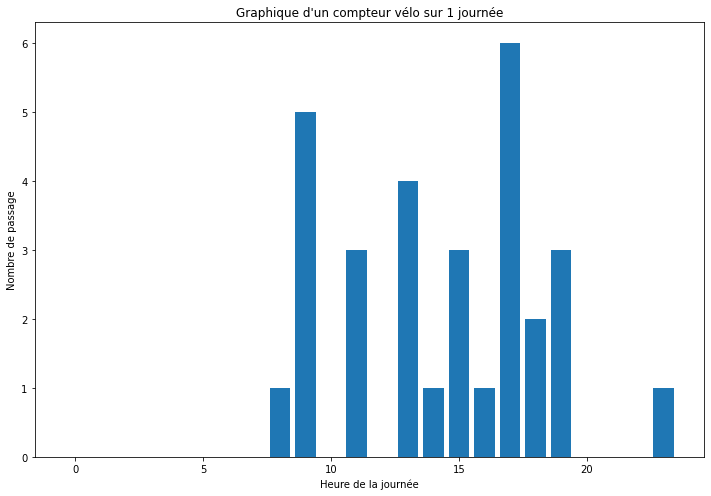

Z203CT6


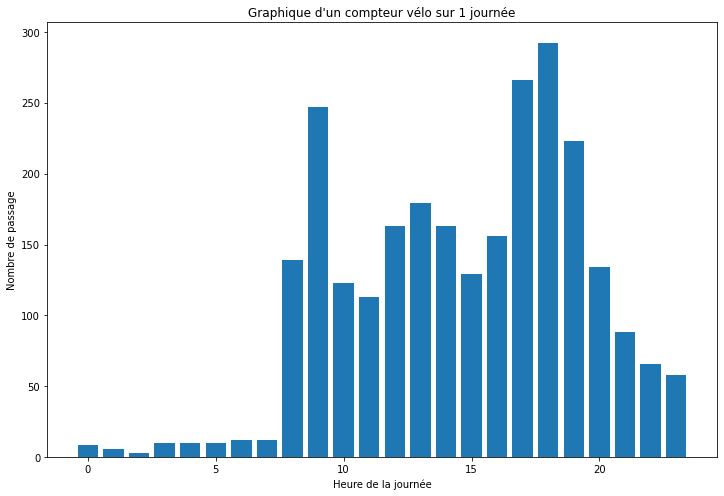

Z904CT5


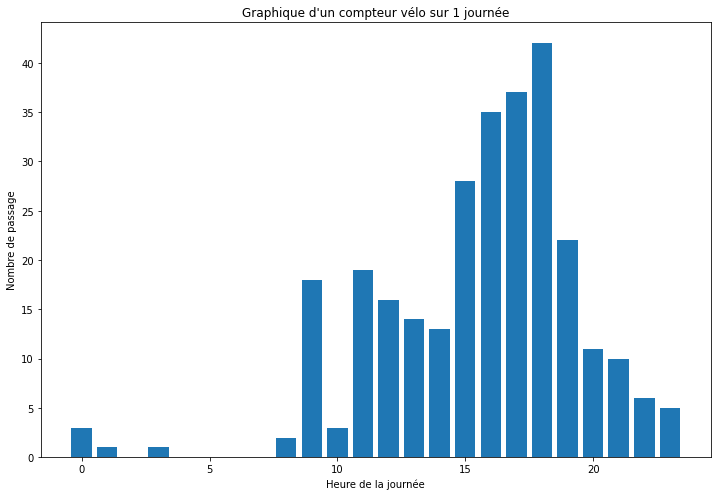

Z901CT5


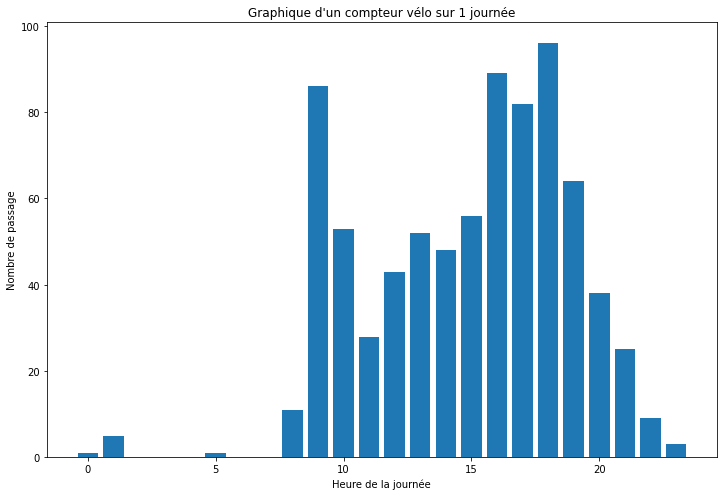

Z901CT4


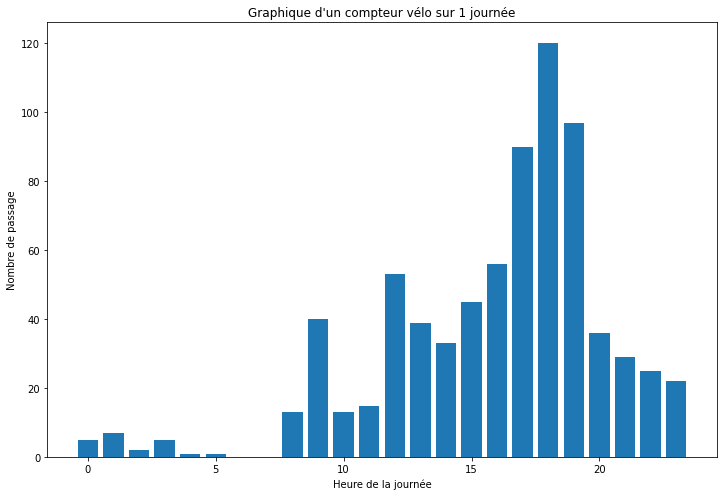

Z601CT7


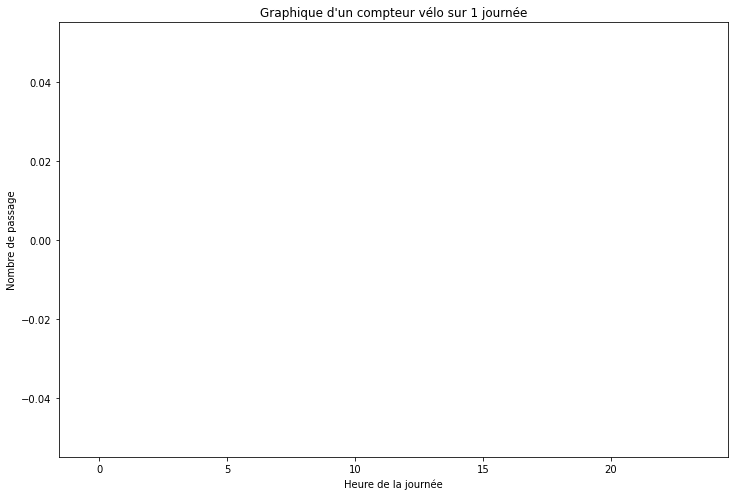

Z901CT7


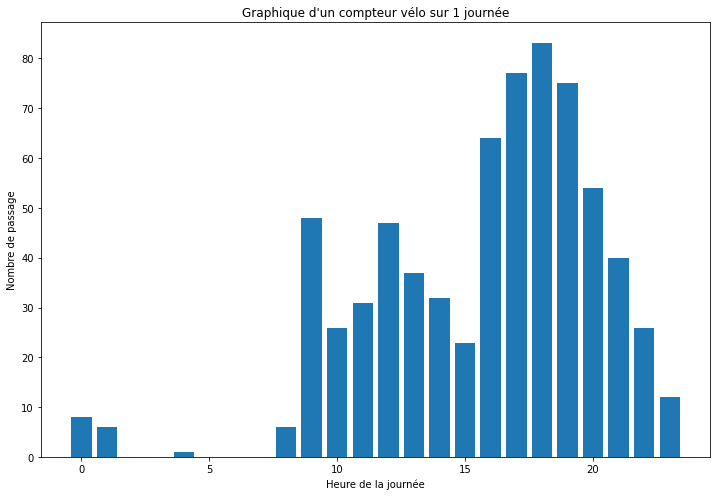

Z401CT8


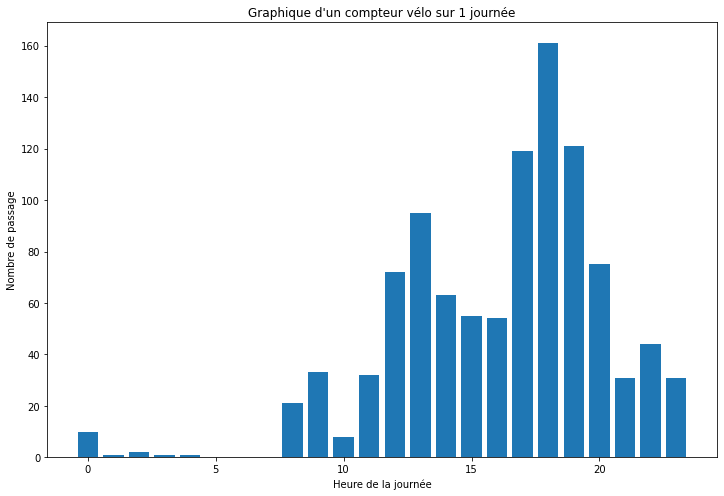

Z401CT9


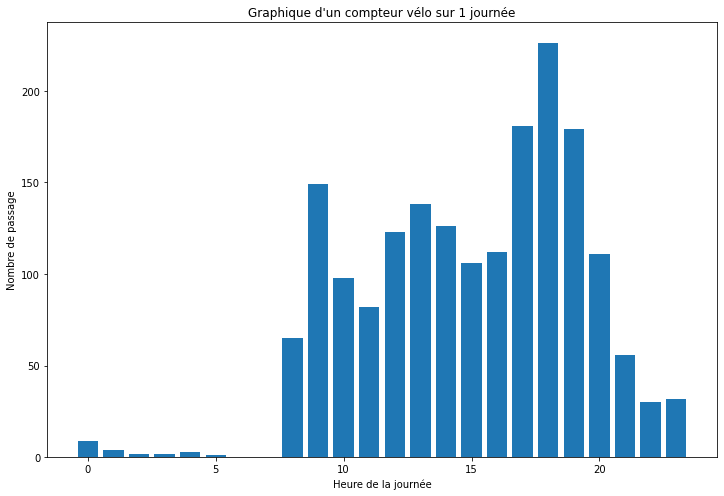

Z2903CT5


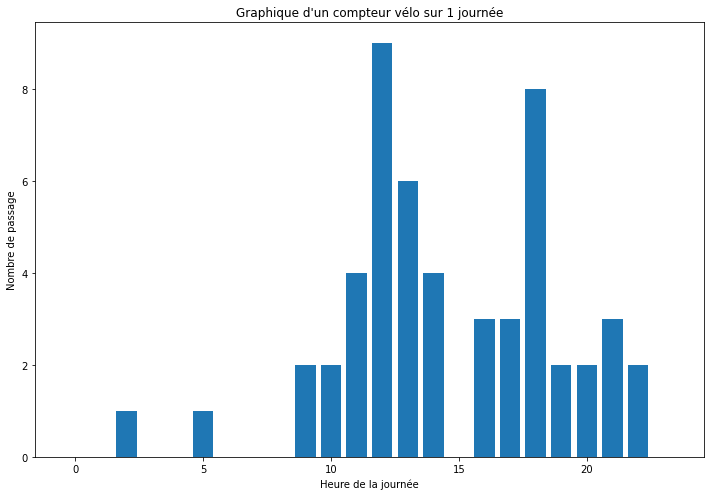

Z2903CT6


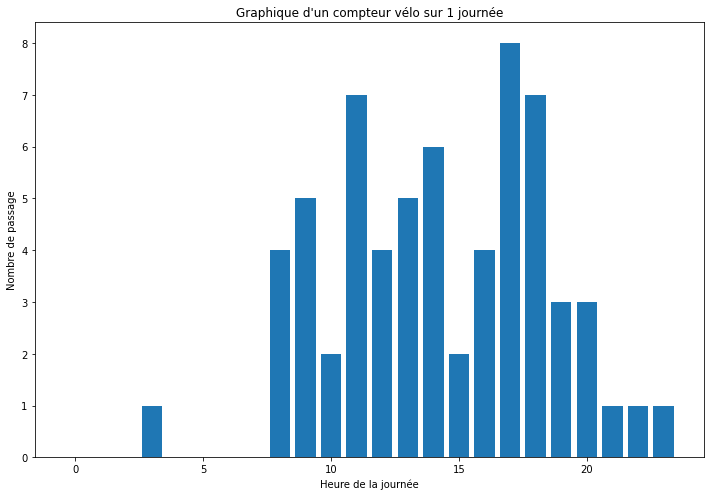

Z1705CT1


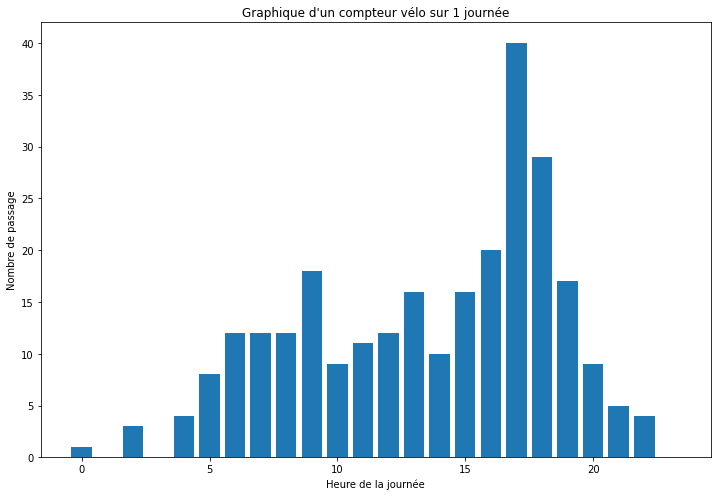

Z203CT7


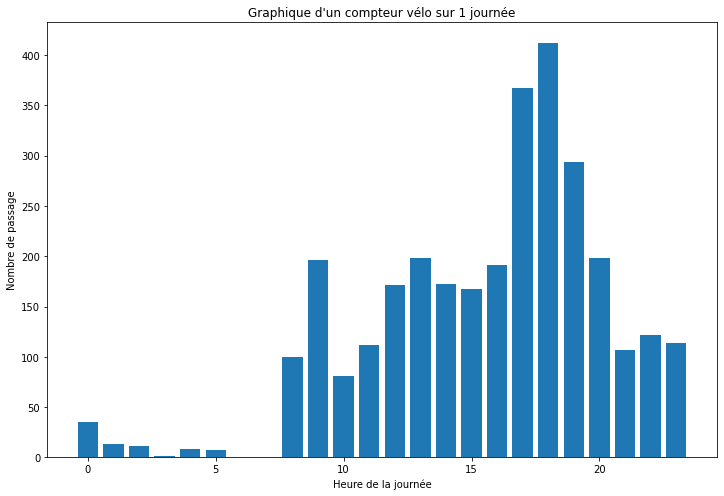

Z31CT11


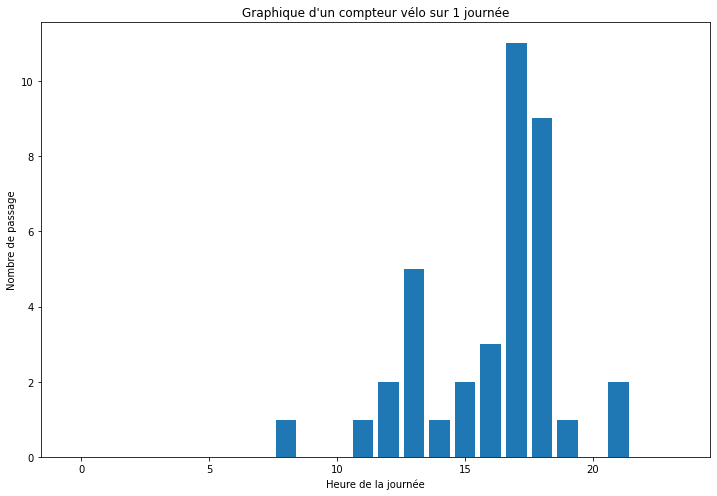

Z201CT5


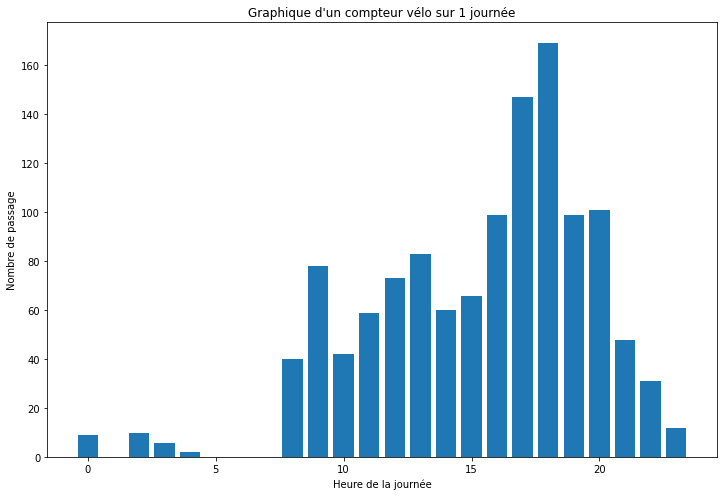

Z2203CT4


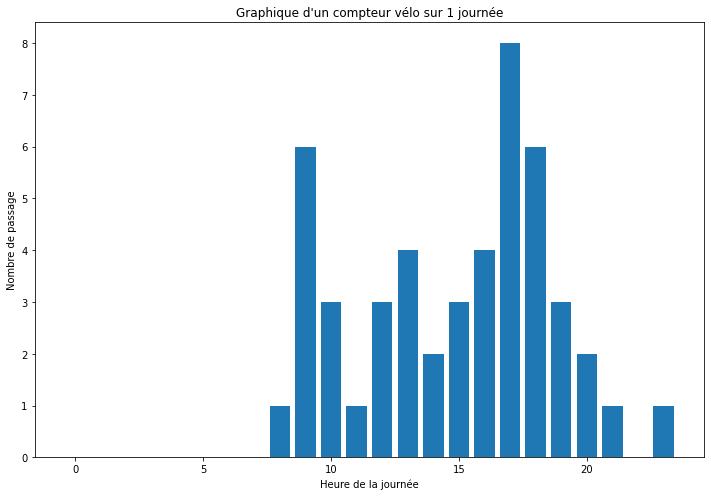

Z1701CT24


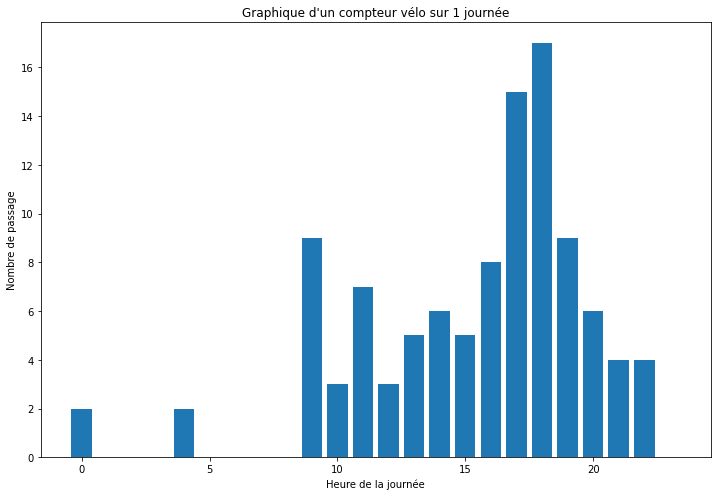

Z2203CT3


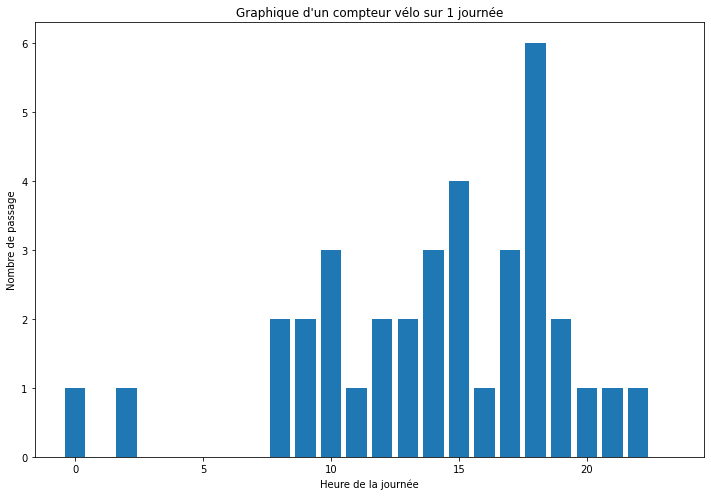

Z1701CT23


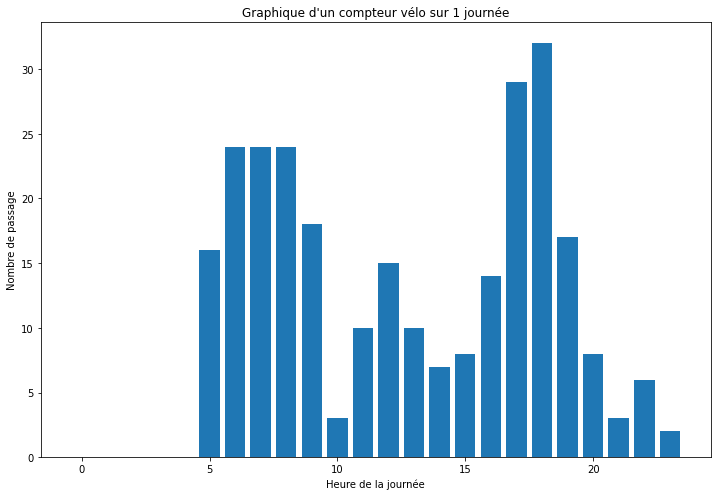

Z24CT23


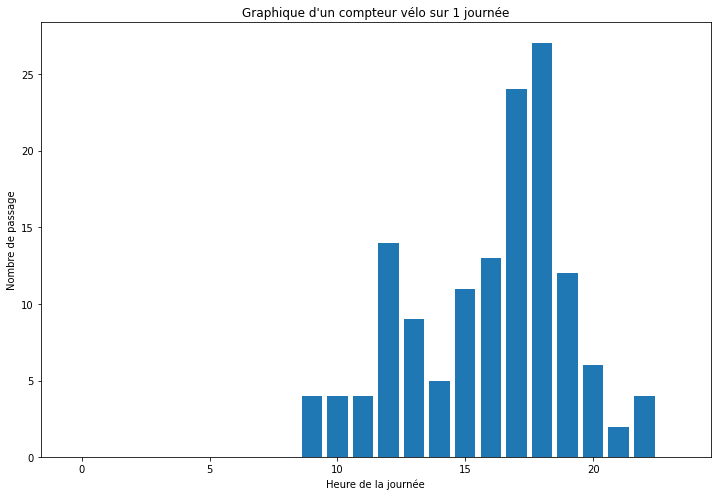

Z24CT24


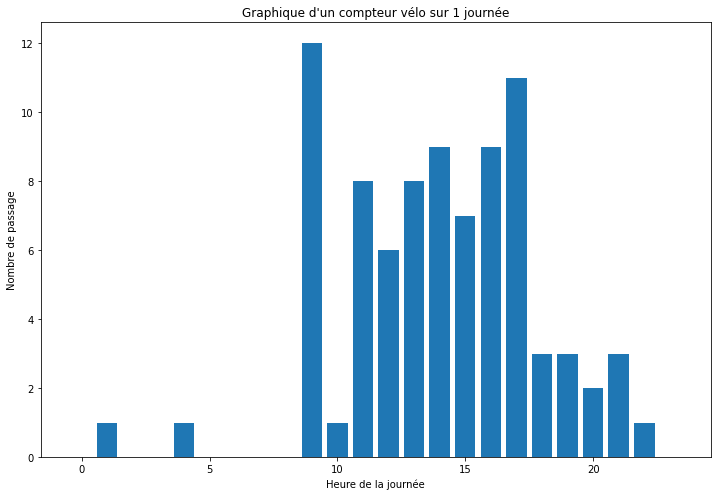

Z1705CT2


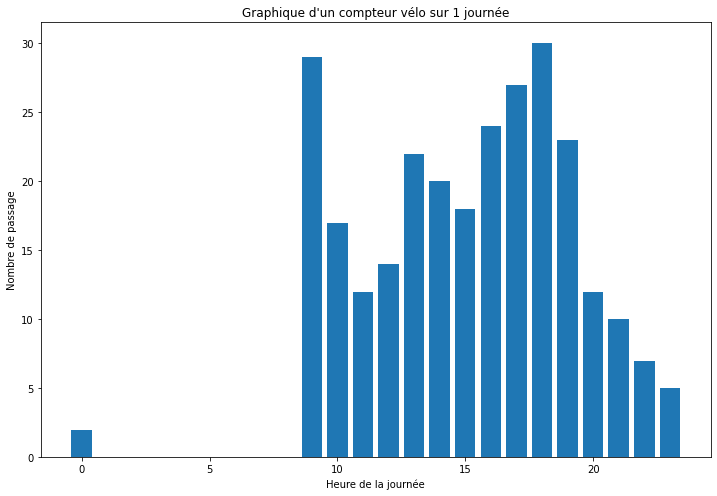

Z201CT4


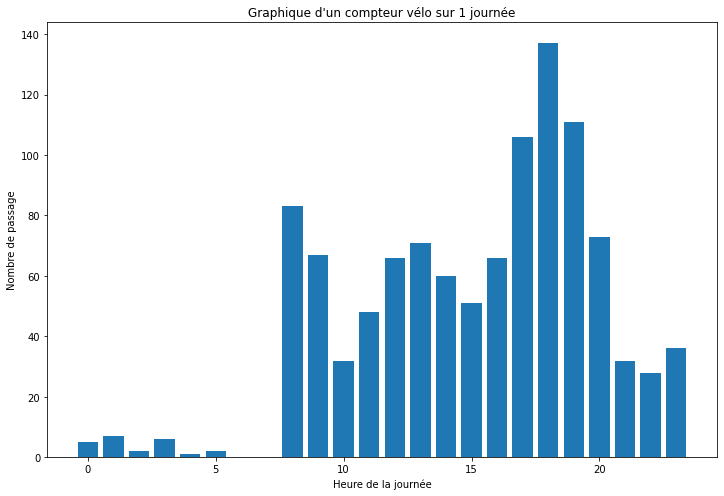

Z401CT12


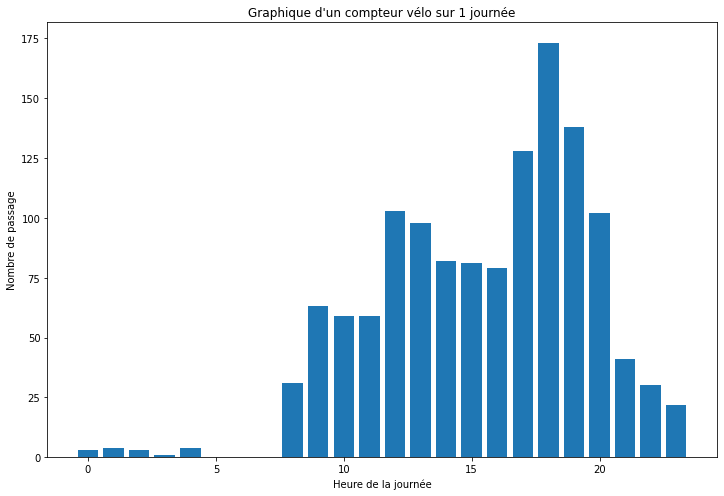

Z401CT11


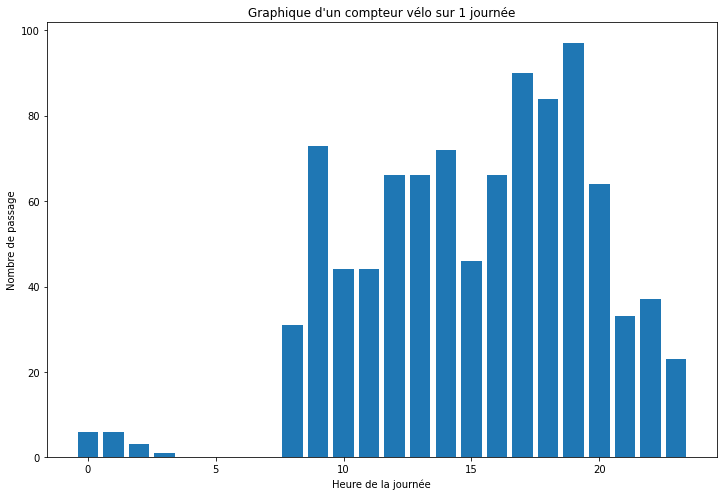

Z503CT24


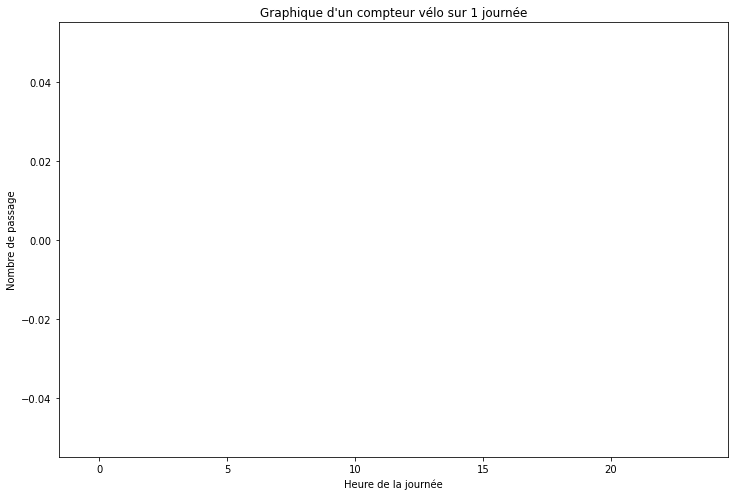

Z502CT24


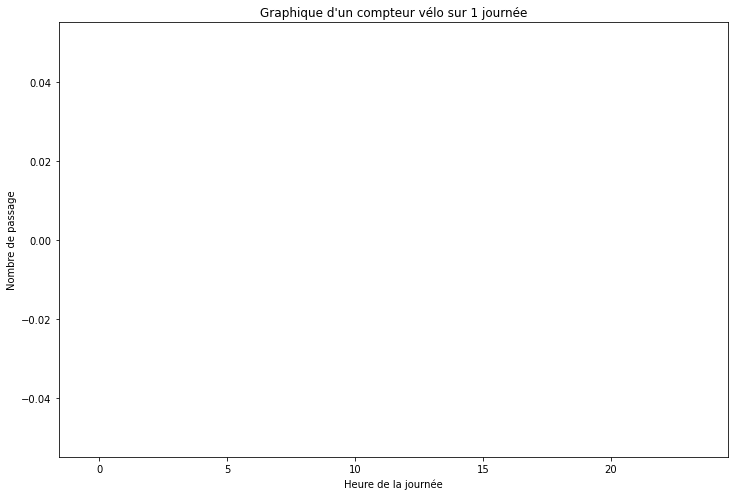

Z503CT23


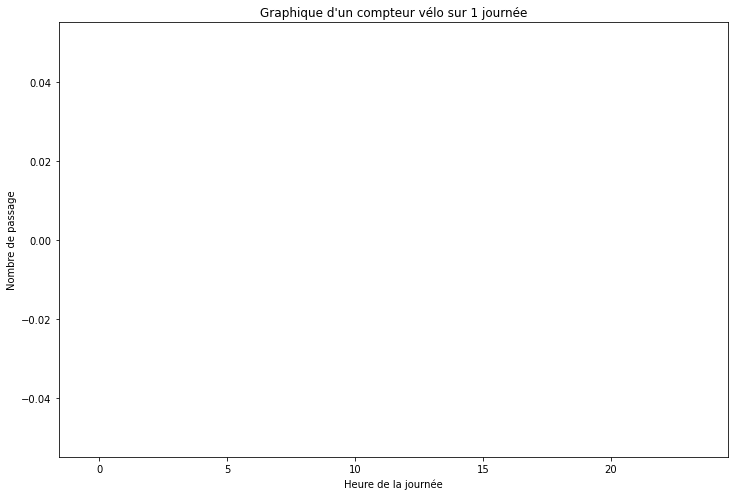

Z502CT23


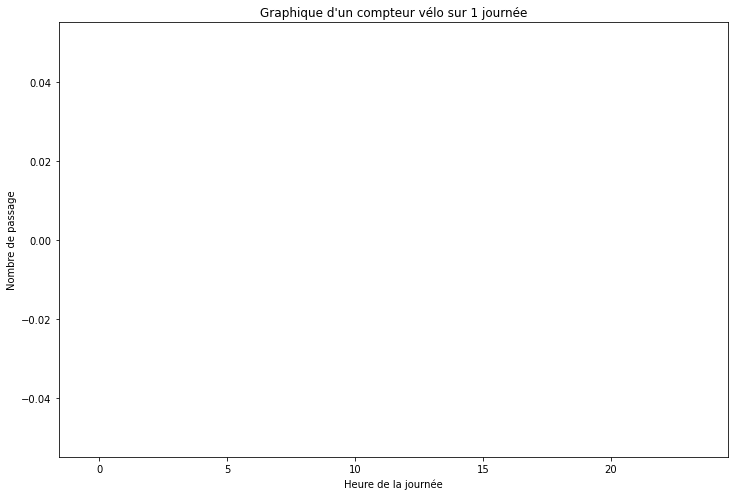

In [16]:
### Automatisation des graphiques:
for id in range(len(list_id)):
    Id = list_id[id]
    print(Id)
    df_cond = df[(df["nb_de_jour"] == "300 days") & (df["ident"] == Id)]
    x = df_cond["heure"]
    y = df_cond["comptage_5m"]
    
    plt.figure(figsize=(12,8))
    plt.bar(x, y, label= "Nombre de passage")
    plt.xlabel("Heure de la journée")
    plt.ylabel("Nombre de passage")
    plt.title("Graphique d'un compteur vélo sur 1 journée")
    
    plt.show()

Z904CT4
Z601CT8
Z901CT6
Z31CT10
Z203CT6
Z904CT5
Z901CT5
Z901CT4
Z601CT7
Z901CT7
Z401CT8
Z401CT9
Z2903CT5
Z2903CT6
Z1705CT1
Z203CT7
Z31CT11
Z201CT5
Z2203CT4
Z1701CT24
Z2203CT3
Z1701CT23
Z24CT23
Z24CT24
Z1705CT2
Z201CT4
Z401CT12
Z401CT11
Z503CT24
Z502CT24
Z503CT23
Z502CT23


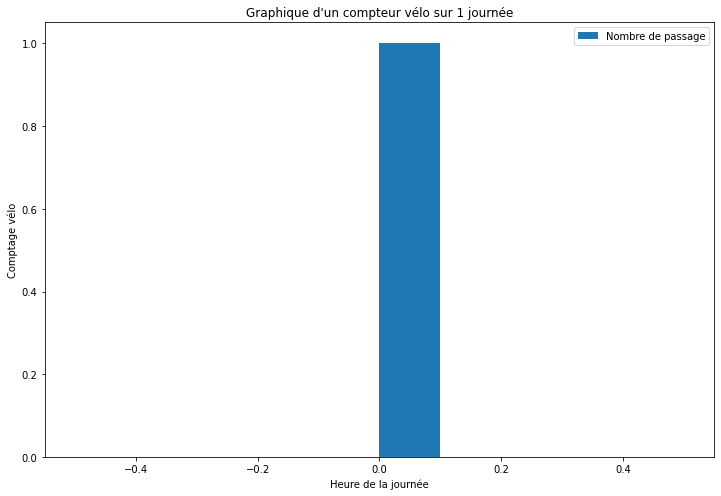

In [17]:
### Comparaison compteur total flux meme journée:
for id in range(len(list_id)):
    Id = list_id[id]
    print(Id)
    df_cond = df[(df["nb_de_jour"] == "300 days") & (df["ident"] == Id)]
    x = df_cond["heure"]
    y = df_cond["comptage_5m"].sum()
    
plt.figure(figsize=(12,8))
plt.hist(y, label= "Nombre de passage")
plt.xlabel("Heure de la journée")
plt.ylabel("Comptage vélo")
plt.title("Graphique d'un compteur vélo sur 1 journée")
plt.legend()
plt.show()

In [ ]:
df

In [56]:
type(df["Geo Point"][0])

str

In [60]:
df2 = df['Geo Point'].str.partition(',')
df2

,0,1,2
0,44.8257189,",",-0.628197
1,44.8257189,",",-0.628197
2,44.8257189,",",-0.628197
3,44.8257189,",",-0.628197
4,44.8257189,",",-0.628197
...,...,...,...
303835,44.8495579,",",-0.5751909
303836,44.8495579,",",-0.5751909
303837,44.8495579,",",-0.5751909
303838,44.8495579,",",-0.5751909


In [ ]:
df.isna().sum()

## # Brouillon ##

In [40]:
objet_groupby_compteur = df.groupby(["ident"])   ### Objet qui regrouper les élements  de la colonne
objet_groupby_compteur.groups.keys()   ### Keys() permet d'avoir les clés


dict_keys(['Z1701CT23', 'Z1701CT24', 'Z1705CT1', 'Z1705CT2', 'Z201CT4', 'Z201CT5', 'Z203CT6', 'Z203CT7', 'Z2203CT3', 'Z2203CT4', 'Z24CT23', 'Z24CT24', 'Z2903CT5', 'Z2903CT6', 'Z31CT10', 'Z31CT11', 'Z401CT11', 'Z401CT12', 'Z401CT8', 'Z401CT9', 'Z502CT23', 'Z502CT24', 'Z503CT23', 'Z503CT24', 'Z601CT7', 'Z601CT8', 'Z901CT4', 'Z901CT5', 'Z901CT6', 'Z901CT7', 'Z904CT4', 'Z904CT5'])

In [43]:
liste_compteur = []
for i in objet_groupby_compteur.groups.keys():
    liste_compteur.append(i)
print(liste_compteur)

['Z1701CT23', 'Z1701CT24', 'Z1705CT1', 'Z1705CT2', 'Z201CT4', 'Z201CT5', 'Z203CT6', 'Z203CT7', 'Z2203CT3', 'Z2203CT4', 'Z24CT23', 'Z24CT24', 'Z2903CT5', 'Z2903CT6', 'Z31CT10', 'Z31CT11', 'Z401CT11', 'Z401CT12', 'Z401CT8', 'Z401CT9', 'Z502CT23', 'Z502CT24', 'Z503CT23', 'Z503CT24', 'Z601CT7', 'Z601CT8', 'Z901CT4', 'Z901CT5', 'Z901CT6', 'Z901CT7', 'Z904CT4', 'Z904CT5']


In [ ]:
objet_groupby_compteur.get_group('Z1701CT23').info()

In [53]:
### Groupement pour avoir les point geo
gb_geo_compteur = df.groupby(["Geo Point"])
gb_geo_compteur.groups.keys()

for i in gb_geo_compteur:
    

dict_keys(['44.7865269,-0.604992', '44.7865409,-0.6051048', '44.7939691,-0.5921401', '44.7939762,-0.5921102', '44.8257189,-0.628197', '44.8258078,-0.628221', '44.8299838,-0.5560119', '44.8299889,-0.5560229', '44.8307298,-0.544754', '44.8307468,-0.5447459', '44.8328178,-0.598687', '44.8332259,-0.5988139', '44.8333418,-0.5984599', '44.8340088,-0.5986439', '44.8356889,-0.5838539', '44.8360088,-0.583488', '44.8371809,-0.5647359', '44.8372518,-0.5648169', '44.8401888,-0.599418', '44.8402348,-0.599419', '44.8430068,-0.579228', '44.8430068,-0.5792738', '44.8495579,-0.5751909', '44.8495679,-0.5752339', '44.8541199,-0.5139069', '44.8541848,-0.5138689', '44.8580193,-0.6635051', '44.8580317,-0.6635033', '44.8700629,-0.5122519', '44.8701089,-0.5124019', '44.8898128,-0.5162488', '44.8898128,-0.5163429'])

In [ ]:
import folium

### création carte avec cadre fr
map_fr = folium.Map()
map_fr.fit_bounds(
    bounds=[
            [41.2611155, -5.4517733],
            [51.3055721, 9.8282225]
    ]
)
map_fr


In [29]:
help(folium.Marker)

Help on class Marker in module folium.map:

class Marker(branca.element.MacroElement)
 |  Marker(location=None, popup=None, tooltip=None, icon=None, draggable=False, **kwargs)
 |  
 |  Create a simple stock Leaflet marker on the map, with optional
 |  popup text or Vincent visualization.
 |  
 |  Parameters
 |  ----------
 |  location: tuple or list
 |      Latitude and Longitude of Marker (Northing, Easting)
 |  popup: string or folium.Popup, default None
 |      Label for the Marker; either an escaped HTML string to initialize
 |      folium.Popup or a folium.Popup instance.
 |  tooltip: str or folium.Tooltip, default None
 |      Display a text when hovering over the object.
 |  icon: Icon plugin
 |      the Icon plugin to use to render the marker.
 |  draggable: bool, default False
 |      Set to True to be able to drag the marker around the map.
 |  
 |  Returns
 |  -------
 |  Marker names and HTML in obj.template_vars
 |  
 |  Examples
 |  --------
 |  >>> Marker(location=[45.5,

In [27]:
### ajout compteur
#df_compteur = ### Nouvelle colonne lat et lon

for i, row in df.iterrows():
    folium.Marker(
        location=row["Geo Point"],
      
    ).add_to(map_fr)


ValueError: ignored